In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('covid_data.csv')

In [3]:
df.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1


In [4]:
df.shape

(2499, 12)

# Data Preprocessing 

In [5]:
pd.value_counts(df['Gender'])

Male           1257
Female         1208
Transgender      34
Name: Gender, dtype: int64

In [6]:
pd.value_counts(df['Severity'])

Mild        1591
Moderate     525
Severe       383
Name: Severity, dtype: int64

In [7]:
pd.value_counts(df['Contact_with_covid_patient'])

No           1203
Yes           638
Not known     633
yes            25
Name: Contact_with_covid_patient, dtype: int64

In [8]:
df['Contact_with_covid_patient'] = df['Contact_with_covid_patient'].str.lower()

In [9]:
pd.value_counts(df['Contact_with_covid_patient'])

no           1203
yes           663
not known     633
Name: Contact_with_covid_patient, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler

In [11]:
gender_label  = LabelEncoder()
df['Gender'] = gender_label.fit_transform(df['Gender'])

In [12]:
pd.value_counts(df['Gender'])#2 also so use one hot encoding, label encoding vs one hot encoder

1    1257
0    1208
2      34
Name: Gender, dtype: int64

In [13]:
severity_label = LabelEncoder()
df['Severity'] = severity_label.fit_transform(df['Severity'])

In [14]:
contact_label = LabelEncoder()
df['Contact_with_covid_patient'] = contact_label.fit_transform(df['Contact_with_covid_patient'])

In [15]:
gender = df['Gender'].values
severity = df['Severity'].values
contact = df['Contact_with_covid_patient'].values

In [16]:
gender

array([1, 1, 2, ..., 0, 0, 0])

In [17]:
severity

array([0, 1, 2, ..., 0, 0, 2])

In [18]:
contact

array([0, 1, 0, ..., 2, 1, 2])

In [19]:
gender_onehot = OneHotEncoder()
gender = gender_onehot.fit_transform(gender.reshape(-1,1))

In [20]:
gender

<2499x3 sparse matrix of type '<class 'numpy.float64'>'
	with 2499 stored elements in Compressed Sparse Row format>

In [21]:
gender = gender.toarray()

In [22]:
gender

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [23]:
severity_onehot = OneHotEncoder()
severity = severity_onehot.fit_transform(severity.reshape(-1,1)).toarray()

contact_onehot = OneHotEncoder()
contact = contact_onehot.fit_transform(contact.reshape(-1,1)).toarray()

In [24]:
severity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [25]:
contact

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [26]:
df.drop(columns = ['Country','Gender','Severity','Contact_with_covid_patient'],inplace = True)

In [27]:
df

,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected
0,10,102,1,0,0,0,1,0
1,20,103,1,1,0,0,0,1
2,55,99,0,0,0,1,1,0
3,37,100,0,1,1,0,0,1
4,45,101,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
2494,73,98,0,1,0,0,0,0
2495,35,104,1,0,1,0,0,1
2496,18,99,1,0,0,1,1,1
2497,39,100,1,0,1,0,0,1


In [28]:
X = df.drop(['Infected'],axis = 1)

In [29]:
y = df['Infected']

In [30]:
X.head()

,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat
0,10,102,1,0,0,0,1
1,20,103,1,1,0,0,0
2,55,99,0,0,0,1,1
3,37,100,0,1,1,0,0
4,45,101,1,1,1,1,0


In [31]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Infected, dtype: int64

In [32]:
X = np.c_[X,gender,severity,contact]

In [33]:
X[0]

array([ 10., 102.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
         0.,   0.,   1.,   0.,   0.])

In [34]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [35]:
X[0]

array([0.        , 0.66666667, 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [38]:
X_train.shape

(1874, 16)

In [39]:
X_test.shape

(625, 16)

# Machine Learning

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [44]:
accuracy_score(y_test,y_pred)

0.9408

In [45]:
confusion_matrix(y_test,y_pred)

array([[277,  18],
       [ 19, 311]], dtype=int64)

In [46]:
y_pred.shape

(625,)

In [47]:
277 + 311 #True Prediction

588

In [48]:
19+18 # False Prediction

37

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       295
           1       0.95      0.94      0.94       330

    accuracy                           0.94       625
   macro avg       0.94      0.94      0.94       625
weighted avg       0.94      0.94      0.94       625



In [50]:
from sklearn.metrics import roc_curve

In [51]:
pred_prob = model.predict_proba(X_test)

In [52]:
fpr,tpr, thresh = roc_curve(y_test,pred_prob[:,1], pos_label=1)

In [53]:
random_prob = [0 for i in range(len(y_test))]
p_fpr,p_tpr,_ = roc_curve(y_test,random_prob,pos_label =1)

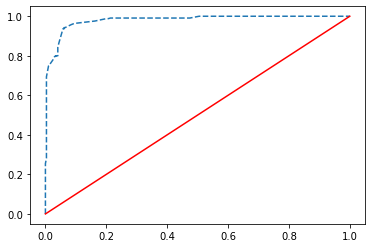

In [54]:
plt.plot(fpr,tpr,linestyle = '--')
plt.plot(p_fpr,p_tpr,color = 'red')
plt.show()


In [55]:
import pickle as pkl

In [56]:
file = open('model.pkl','wb')
pkl.dump(model,file)
file.close()

In [57]:
file = open('gender_label.pkl','wb')
pkl.dump(gender_label,file)
file.close()

file = open('gender_onehot.pkl','wb')
pkl.dump(gender_onehot,file)
file.close()

file = open('severity_label.pkl','wb')
pkl.dump(severity_label,file)
file.close()

file = open('severity_onehot.pkl','wb')
pkl.dump(severity_onehot,file)
file.close()

file = open('contact_label.pkl','wb')
pkl.dump(contact_label,file)
file.close()

file = open('contact_onehot.pkl','wb')
pkl.dump(contact_onehot,file)
file.close()

In [58]:
file = open('minmax.pkl','wb')
pkl.dump(minmax,file)
file.close()